In [16]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axisartist.axislines import AxesZero

In [2]:
def circle(radius):
    phi = np.linspace(0, 2*np.pi, 300)
    return radius * np.cos(phi), radius * np.sin(phi)

In [22]:
def axes_through_origin(ax):
    # set the x-spine
    ax.spines['left'].set_position('zero')

    # turn off the right spine/ticks
    ax.spines['right'].set_color('none')

    # set the y-spine
    ax.spines['bottom'].set_position('zero')

    # turn off the top spine/ticks
    ax.spines['top'].set_color('none')

def axes_through_origin(ax):
    '''Set axes with arrows through origin.
    
    From matplotlib documentation:
    https://matplotlib.org/stable/gallery/spines/centered_spines_with_arrows.html
    '''
    # Move the left and bottom spines to x = 0 and y = 0, respectively.
    ax.spines[["left", "bottom"]].set_position(("data", 0))
    # Hide the top and right spines.
    ax.spines[["top", "right"]].set_visible(False)

    # Draw arrows (as black triangles: ">k"/"^k") at the end of the axes.  In each
    # case, one of the coordinates (0) is a data coordinate (i.e., y = 0 or x = 0,
    # respectively) and the other one (1) is an axes coordinate (i.e., at the very
    # right/top of the axes).  Also, disable clipping (clip_on=False) as the marker
    # actually spills out of the axes.
    ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
    ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)

def no_ticks_labels(ax):
    # Hide X and Y axes label marks
    ax.xaxis.set_tick_params(labelbottom=False)
    ax.yaxis.set_tick_params(labelleft=False)

    # Hide X and Y axes tick marks
    ax.set_xticks([])
    ax.set_yticks([])


    


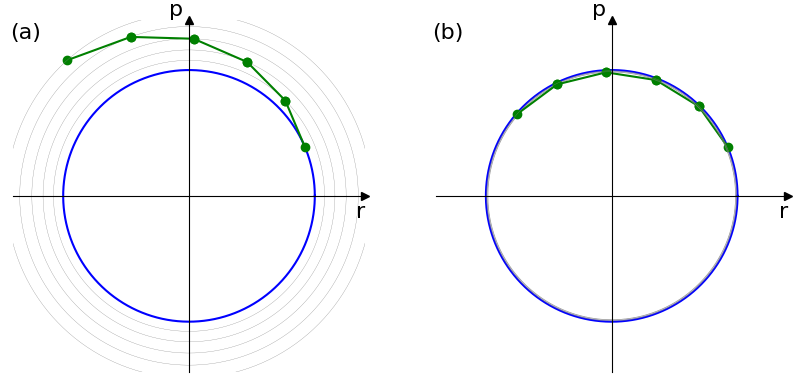

In [49]:
fig, axes = plt.subplots(1, 2, figsize=(10,20))
for ax, label in zip(axes, ['(a)', '(b)']):
    ax.set_aspect(1.0)

    axes_through_origin(ax)
    no_ticks_labels(ax)

    ax.plot(*circle(1.0), 'b')

    ax.set_xlabel('r', fontsize=16, loc="right")
    ax.set_ylabel('p', fontsize=16, loc="top", rotation=0)
    l = 1.4
    ax.set_xlim(-l, l)
    ax.set_ylim(-l, l)
    dl = 0.1
    ax.text(-l+dl, l-dl, label, ha='center', va='center', fontsize=16)


# Euler algorithm
ax = axes[0]
phi0 = 0.4
stepsize = 0.4
x, y = np.cos(phi0), np.sin(phi0)
for i in range(5):
    dx = - stepsize * y
    dy = stepsize * x
    ax.plot([x, x+dx], [y, y + dy], 'go-')
    x, y = x + dx, y + dy
    ax.plot(*circle(np.sqrt(x**2 + y**2)), color='gray', linewidth=0.2)

# Verlet algorithm
ax = axes[1]
x, y = np.cos(phi0), np.sin(phi0)
for i in range(5):
    dy1 = 0.5 * stepsize * x
    dx = - stepsize * (y + dy1)
    dy2 = 0.5 * stepsize * (x + dx)
    ax.plot([x, x+dx], [y, y + dy1 + dy2], 'go-')
    x, y = x + dx, y + dy1 + dy2
    ax.plot(*circle(np.sqrt(x**2 + y**2)), color='gray', linewidth=0.2)

plt.savefig('MD_Algorithms.png', dpi=200)
